In [3]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

# ******I DON'T NEED ALICE REJECTIONS FOR CLASSIFICATION. THAT WAS JUST TO SHOW THE BUSINESS CASE******

to find year of application filing [link](https://www.uspto.gov/web/offices/ac/ido/oeip/taf/filingyr.htm)
```
Filing Year	| 1st Utility Application  |	1st Design Application | 1st Provisional Application
2015	    |         14 544,379	   |          29	474,693	   |        62 	124,715
2016	    |         14 757,791	   |          29	505,607	   |        62	387,330
```

In [4]:
df=pd.read_csv('/Users/rcm/Google Drive/Galvanize Data Science Immersive/Capstone/data/classification/apps_705_706_000000000001.csv', index_col=None,)


In [7]:
df.head()

,publication_number,application_number,family_id,code,clm,descr,art_unit
0,US-7882053-B2,US-34887306-A,22971606,706/45.,1. A computer-implemented method of designing ...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,2129.0
1,US-2013191267-A1,US-201313790578-A,44973264,705/37.,What is claimed is: \n \n 1 . A sy...,RELATED APPLICATIONS \n This application i...,NaN
2,US-8046710-B2,US-23096608-A,40473045,706/47.,1. A weather information display device compri...,CROSS REFERENCE TO RELATED APPLICATION \n ...,2172.0
3,US-2014372247-A1,US-201314373058-A,48799773,705/26.9,1 . A method of obtaining a user&#39;s measure...,TECHNICAL FIELD \n The present disclosure ...,NaN
4,US-2012158440-A1,US-201213408855-A,40642899,705/4.,1 . A method for providing borrower foreclosur...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,NaN


In [8]:
df.sort_values(by=['application_number'], na_position='first')

,publication_number,application_number,family_id,code,clm,descr,art_unit
3281,US-6353816-B1,US-10049398-A,15829701,706/17.,What is claimed is: \n \n 1. A neur...,BACKGROUND OF THE INVENTION \n 1. Field of...,2122.0
998,US-6421654-B1,US-10146499-A,9497710,706/16.,What is claimed is: \n \n 1. Proces...,TECHNICAL DOMAIN \n This invention relates...,2121.0
759,US-2003177105-A1,US-10181402-A,28040076,706/13.,We claim: \n \n 1 . A genetic alg...,FIELD OF THE INVENTION \n [0001] The pr...,NaN
4585,US-5537590-A,US-10258193-A,22290576,706/45.,What is claimed: \n \n 1. An apparat...,BACKGROUND OF THE INVENTION \n The inventi...,237.0
194,US-2002161730-A1,US-10283102-A,27346393,706/62.,What is claimed is: \n \n 1 . A s...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,NaN
1821,US-5481644-A,US-10285993-A,26518048,706/20.,What is claimed is: \n \n 1. A speec...,BACKGROUND OF THE INVENTION \n 1. Field of...,238.0
4102,US-2003182136-A1,US-10305902-A,28040304,706/45.,What is claimed is: \n \n 1 . A m...,FIELD OF THE INVENTION \n [0001] The il...,NaN
26,US-2010031359-A1,US-10349808-A,40821844,706/52.,1 . A method of detecting shell code in an arb...,RELATED APPLICATION \n This application cl...,NaN
3205,US-5384934-A,US-1037493-A,6450446,706/900.,I claim: \n \n 1. A process for impr...,BACKGROUND OF THE INVENTION \n The instant...,247.0
3644,US-4984773-A,US-10515987-A,22304365,706/919.,We claim: \n \n 1. A sequential refi...,FIELD OF THE INVENTION \n This invention r...,341.0


# Clean USPC code text using list comprehension

In [10]:
df[df['application_number'].str.startswith('US-14')]

,publication_number,application_number,family_id,code,clm,descr,art_unit
349,US-2002143719-A1,US-14683702-A,18773256,706/20.,What is claimed is: \n \n 1 . A p...,[0001] CROSS-REFERENCE TO RELATED APPLICATIONS...,NaN
789,US-7475050-B2,US-14419905-A,37493099,706/47.,1. A computer-implemented software system for ...,BACKGROUND OF THE INVENTION \n Analytical ...,2129.0
848,US-7035834-B2,US-14513102-A,29269736,706/26.,1. A method for monitoring an engine using a c...,TECHNICAL FIELD \n The present invention rel...,2129.0
898,US-2009327180-A1,US-14724108-A,41448659,706/15.,1 . A system for dynamic classification of dat...,BACKGROUND OF THE INVENTION \n 1. Field of...,NaN
971,US-2006010091-A1,US-1478504-A,34927855,706/13.,1 . A solution search apparatus which searches...,BACKGROUND OF THE INVENTION \n 1. Field ...,NaN
1426,US-2005273447-A1,US-14181305-A,34972214,706/12.,1 . A computer-implemented method for determin...,This application claims priority to U.S. Provi...,NaN
1613,US-7721304-B2,US-14872505-A,35599327,706/21.,"1. A method, comprising the machine-implemente...",PRIORITY CLAIM; CROSS-REFERENCE TO RELATED APP...,2194.0
1697,US-7543233-B2,US-14189705-A,37495543,706/46.,1. A method comprising:\n capturing a heteroge...,FIELD OF THE INVENTION \n The present invent...,2174.0
2037,US-2009024546-A1,US-14460608-A,40186262,706/12.,"1 . A method, comprising:\n processing usage d...",CROSS REFERENCE TO RELATED APPLICATION \n ...,NaN
2121,US-7133854-B2,US-1416601-A,8174278,706/26.,1. Method for encoding an input pattern of eac...,FIELD OF THE INVENTION \n The present invent...,2121.0


In [13]:
df['code'] = [x[:3] for x in df['code']]

In [14]:
df.head()

,publication_number,application_number,family_id,code,clm,descr,art_unit
0,US-7882053-B2,US-34887306-A,22971606,706,1. A computer-implemented method of designing ...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,2129.0
1,US-2013191267-A1,US-201313790578-A,44973264,705,What is claimed is: \n \n 1 . A sy...,RELATED APPLICATIONS \n This application i...,NaN
2,US-8046710-B2,US-23096608-A,40473045,706,1. A weather information display device compri...,CROSS REFERENCE TO RELATED APPLICATION \n ...,2172.0
3,US-2014372247-A1,US-201314373058-A,48799773,705,1 . A method of obtaining a user&#39;s measure...,TECHNICAL FIELD \n The present disclosure ...,NaN
4,US-2012158440-A1,US-201213408855-A,40642899,705,1 . A method for providing borrower foreclosur...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,NaN


# Count mix of 706 and 705

In [15]:
df['code'].value_counts()

705    3264
706    2572
Name: code, dtype: int64

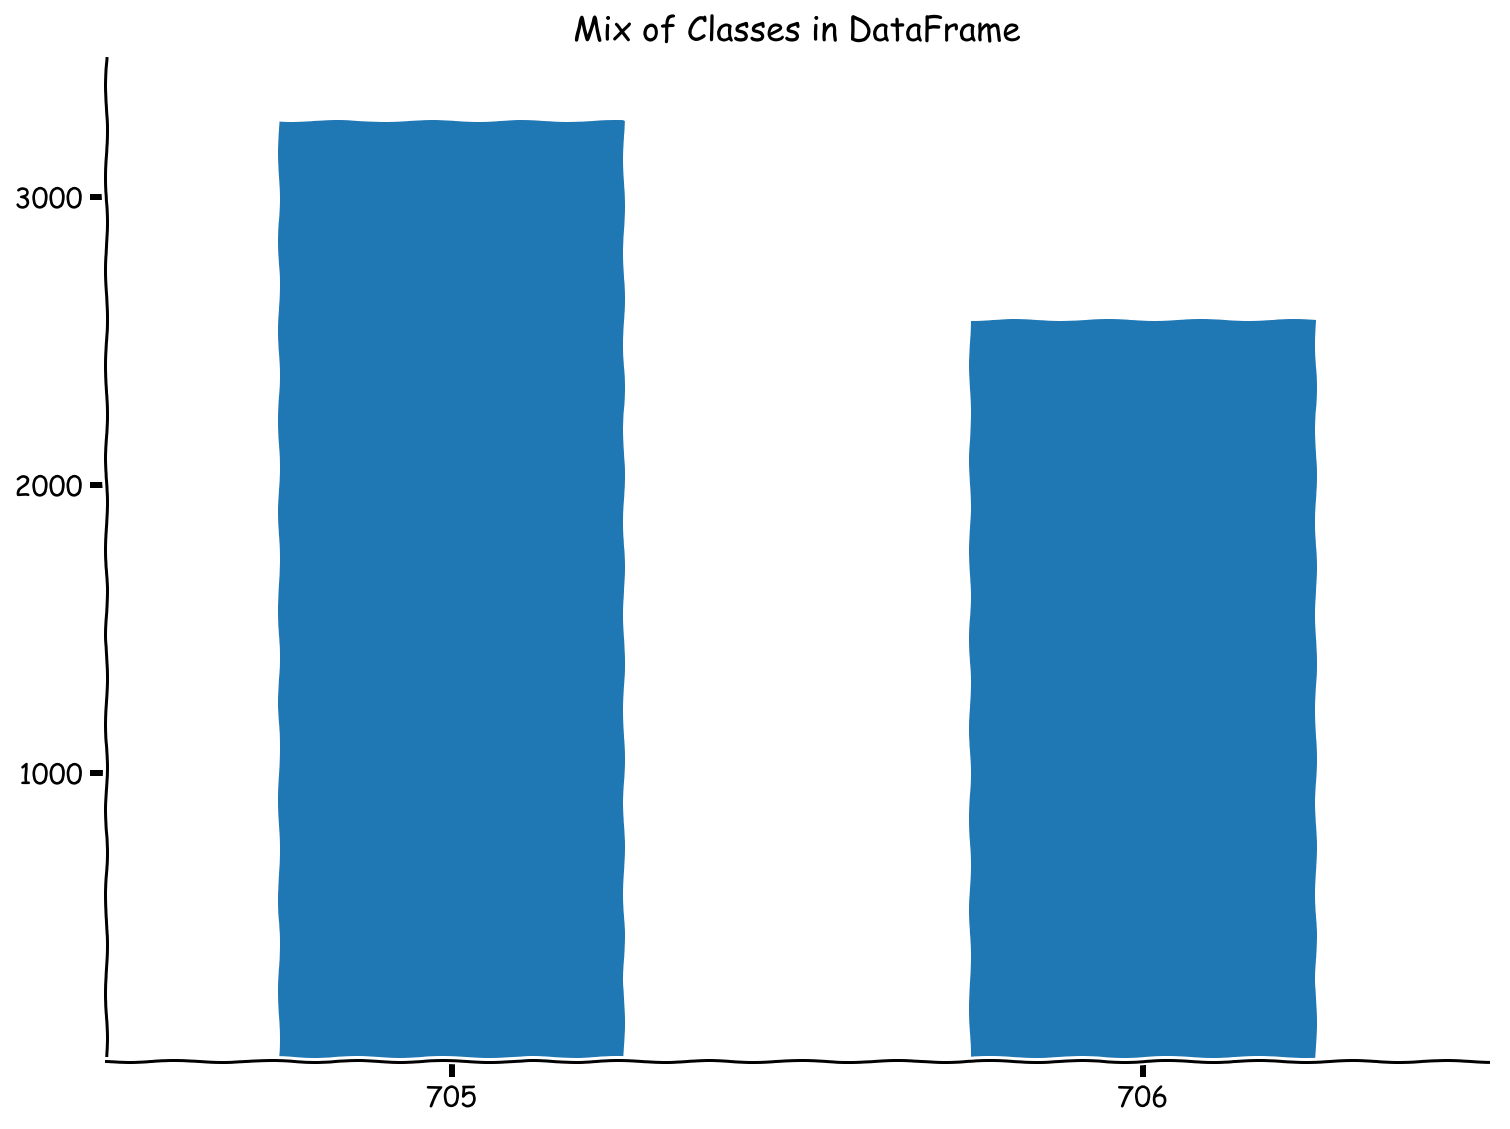

In [23]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0,1], [3264,2572], 0.5)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 3500])
    ax.set_xticklabels(['705', '706'])
    plt.yticks([1000,2000,3000])

    plt.title("Mix of Classes in DataFrame")

 

# create dataset of classes (target), description and claims (features)

In [25]:
df_class_description_claims = df[['descr','clm','code']]

In [26]:
df_class_description_claims.head()

,descr,clm,code
0,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,1. A computer-implemented method of designing ...,706
1,RELATED APPLICATIONS \n This application i...,What is claimed is: \n \n 1 . A sy...,705
2,CROSS REFERENCE TO RELATED APPLICATION \n ...,1. A weather information display device compri...,706
3,TECHNICAL FIELD \n The present disclosure ...,1 . A method of obtaining a user&#39;s measure...,705
4,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,1 . A method for providing borrower foreclosur...,705


In [29]:
df_class_description_claims.to_csv('/Users/rcm/Google Drive/Galvanize Data Science Immersive/Capstone/data/classification/small_descr_clm_code.csv')